# EDA on NYC-Flight data


## Exploration ideas:

1. Find out the Peak month of the flights?

2. (a). Which airline has maximum departure delays?

   (b). Which airline has maximum departure delays in average minutes?
   
   (c). Which Month has  maximum Departure delays?
   
   (d). Which flight is having maximum departure delay?

3. Which is the best airport in terms of time departure %?

4. Aircraft speed analysis.

5. On time arrival % analysis?

6. Maximum number of flights headed to some particular destination.

7. Shortest path.

In [1]:
import numpy as np                      # linear algebra
import pandas as pd                     # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns                    #for Plotting
import pandas_profiling
import collections
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
local_path = "C:/Users/Aravind/Desktop/UpX Academy/Data Science Track - 01/PROJECTS TO BE DOING/Project Datasets/Project_1_NYC-Flight_data/flight_data.csv"
df_flight = pd.read_csv(local_path)                           #load CSV file from local directory
df_flight.head()                                         # Preview the first 5 lines of the loaded data

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


In [4]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


In [5]:
pandas_profiling.ProfileReport(df_flight)

Number of variables,19
Number of observations,336776
Total Missing (%),0.6%
Total size in memory,48.8 MiB
Average record size in memory,152.0 B
Numeric,9
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,5


In [6]:
# Find null values. 
df_flight.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [7]:
df_flight.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


# Fill null values

In [8]:
# Fill null values with mode
cols = ['dep_delay','arr_delay']
df_flight[cols] = df_flight[cols].fillna(df_flight.mode().iloc[0])

In [9]:
df_flight.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay            0
arr_time          8713
sched_arr_time       0
arr_delay            0
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [10]:
df_flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


# Exploration ideas 

## Q1 - In Which Month flights are more demanding? (Peak time of flight)


In [11]:
# Create dataset to analyse season of flight
flight_numeric_data = df_flight[['month','flight']]
flight_numeric_data.head()

,month,flight
0,1,1545
1,1,1714
2,1,1141
3,1,725
4,1,461


In [12]:
# Floring and coupling (1 % to 99 %) approach for Outlier treatment 
np.round(flight_numeric_data.quantile(np.arange(0,1.05,0.05)),2) 

,month,flight
0.00,1.0,1.0
0.05,1.0,91.0
0.10,2.0,209.0
0.15,2.0,329.0
0.20,3.0,421.0
0.25,4.0,553.0
0.30,4.0,706.0
0.35,5.0,901.0
0.40,5.0,1115.0
0.45,6.0,1262.0


In [13]:
for x in flight_numeric_data.columns:
    percentiles = flight_numeric_data[x].quantile([0.01,0.99]).values
    flight_numeric_data[x][flight_numeric_data[x] <= percentiles[0]] = percentiles[0]
    flight_numeric_data[x][flight_numeric_data[x] >= percentiles[1]] = percentiles[1]

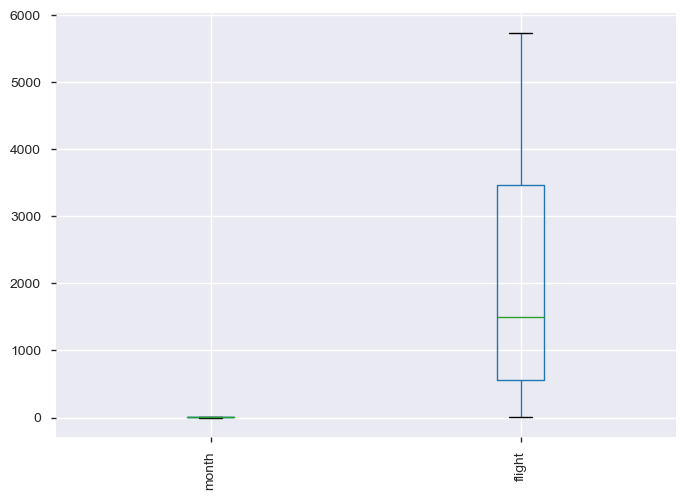

In [14]:
# boxplot for visualizations
flight_numeric_data.boxplot()
plt.xticks(rotation=90)
plt.show();

In [15]:
# Z Score based approach for Outlier treatment 
from scipy import stats
zscore = np.abs(stats.zscore(flight_numeric_data))
zscore
zscore_df = pd.DataFrame(zscore)
zscore_df.head()

array([[1.62500738, 0.26121757],
       [1.62500738, 0.15745581],
       [1.62500738, 0.50926345],
       ...,
       [0.71797462, 0.9151584 ],
       [0.71797462, 0.98330961],
       [0.71797462, 0.95813664]])

,0,1
0,1.625007,0.261218
1,1.625007,0.157456
2,1.625007,0.509263
3,1.625007,0.764677
4,1.625007,0.926766


In [16]:
flight_numeric_data_cleaned = flight_numeric_data[(zscore<3).all(axis=1)]

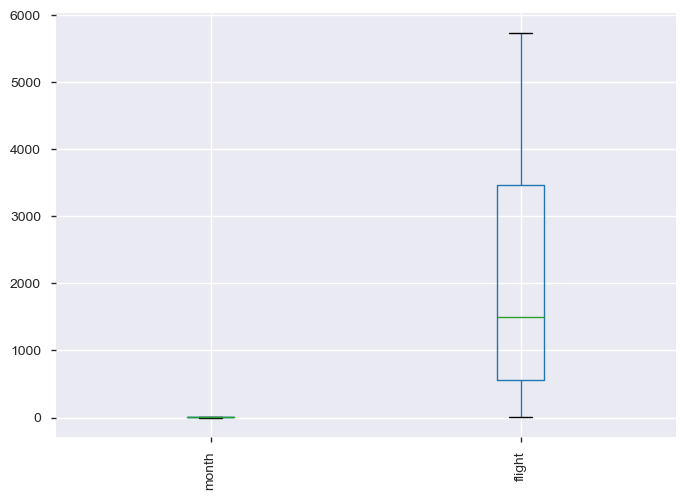

In [17]:
flight_numeric_data_cleaned.boxplot()
plt.xticks(rotation=90)
plt.show();

In [18]:
# IQR based approach for Outlier treatment. 
q1 = flight_numeric_data_cleaned.quantile(0.25)
q3 = flight_numeric_data_cleaned.quantile(0.75)
iqr = q3-q1
iqr

month        6.0
flight    2912.0
dtype: float64

In [19]:
flight_numeric_cleaned_data = flight_numeric_data_cleaned [~((flight_numeric_data_cleaned<(q1-1.5*iqr))|(flight_numeric_data_cleaned>(q3+1.5*iqr))).any(axis=1)]
flight_numeric_cleaned_data.describe()

,month,flight
count,336776.000000,336776.000000
mean,6.548510,1970.453159
std,3.414457,1628.733409
min,1.000000,11.000000
25%,4.000000,553.000000
50%,7.000000,1496.000000
75%,10.000000,3465.000000
max,12.000000,5736.000000


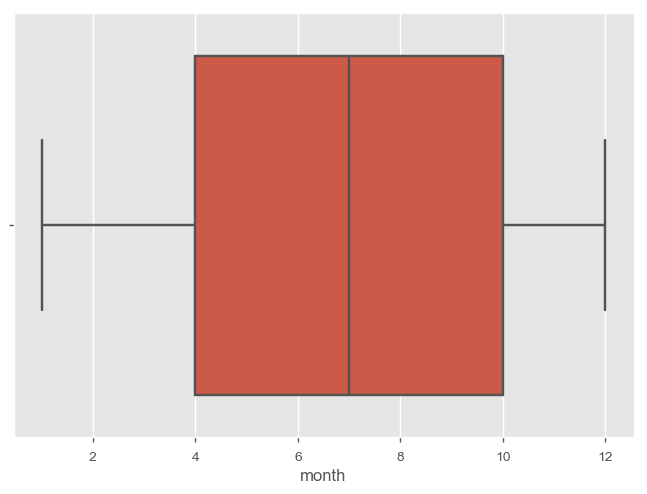

In [20]:
# boxplot for month 
from matplotlib import style
style.use('ggplot')
sns.boxplot(x='month',data=flight_numeric_cleaned_data)
plt.show();

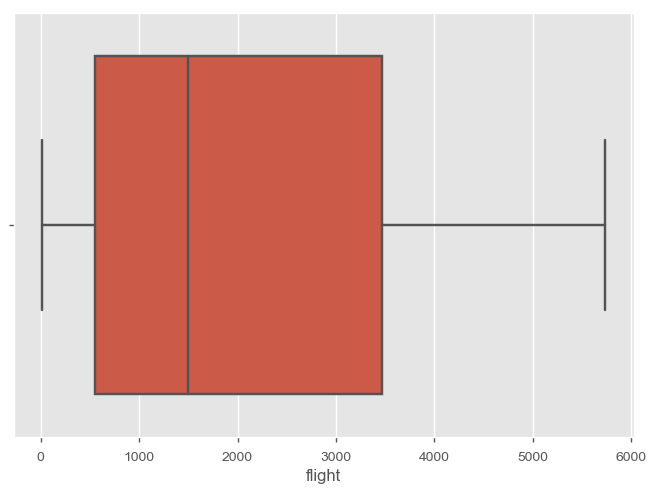

In [21]:
# boxplot for flight 
from matplotlib import style
style.use('ggplot')
sns.boxplot(x='flight',data=flight_numeric_cleaned_data)
plt.show();

In [22]:
group_1 = flight_numeric_cleaned_data['flight'].groupby(flight_numeric_cleaned_data['month'])
group_2 = group_1.count()
group_3 = group_2.sort_values(ascending=False)
group_3

month
7     29425
8     29327
10    28889
3     28834
5     28796
4     28330
6     28243
12    28135
9     27574
11    27268
1     27004
2     24951
Name: flight, dtype: int64

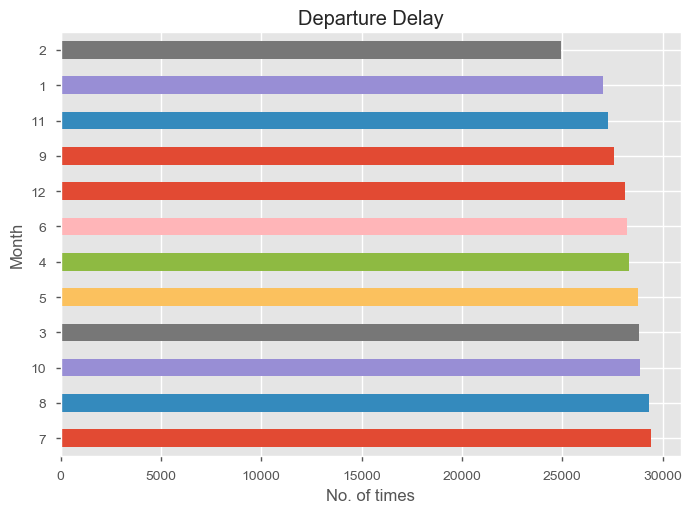

In [23]:
group_3.plot(kind ='barh', title = 'Departure Delay')
plt.xlabel('No. of times')
plt.ylabel('Month')
plt.show();

## ANS - July month has the highest number of flights (Total 29,425 no. of Flights).

## Q2 (a) - Which Airline has maximum Departure delays.

In [24]:
group_max = df_flight['dep_delay'].groupby(df_flight['carrier'])
group_max_1 = group_max.agg('count')
max_dep_del_total = group_max_1.sort_values(ascending=False)
max_dep_del_total

carrier
UA    58665
B6    54635
EV    54173
DL    48110
AA    32729
MQ    26397
US    20536
9E    18460
WN    12275
VX     5162
FL     3260
AS      714
F9      685
YV      601
HA      342
OO       32
Name: dep_delay, dtype: int64

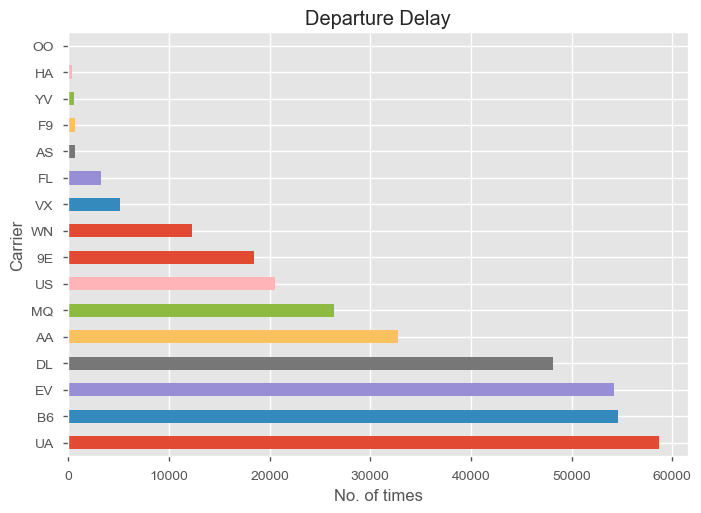

In [25]:
max_dep_del_total.plot(kind ='barh', title = 'Departure Delay')
plt.xlabel('No. of times')
plt.ylabel('Carrier')
plt.show();

## ANS - Carrier UA has the maximum departure delay in total of 58,665 times in a year.

## (b) - Which airline has maximum departure delays in average minutes?

In [26]:
group_max_1 = group_max.agg('mean')
max_dep_del_total = round(group_max_1.sort_values(ascending=False))
max_dep_del_total

carrier
F9    20.0
EV    19.0
FL    18.0
WN    17.0
YV    17.0
9E    15.0
B6    13.0
VX    13.0
UA    12.0
OO    11.0
MQ    10.0
DL     9.0
AA     8.0
AS     6.0
HA     5.0
US     3.0
Name: dep_delay, dtype: float64

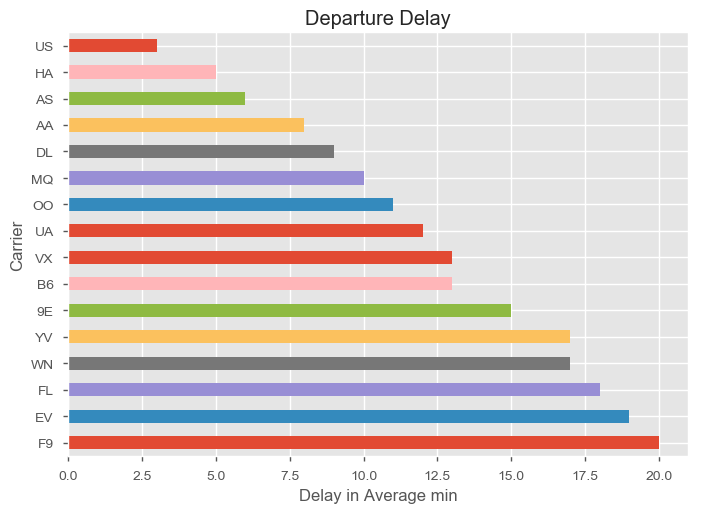

In [27]:
max_dep_del_total.plot(kind ='barh', title = 'Departure Delay')
plt.xlabel('Delay in Average min')
plt.ylabel('Carrier')
plt.show();

## ANS - Carrier F9 has the maximum departure delay on an avergae of 20 minutes in a year.

## (c) - Which Month has  maximum Departure delays.

In [28]:
group_month = df_flight['dep_delay'].groupby(df_flight['month'])
group_month_1 = group_month.agg('count')
max_dep_del_total = group_month_1.sort_values(ascending=False)
max_dep_del_total

month
7     29425
8     29327
10    28889
3     28834
5     28796
4     28330
6     28243
12    28135
9     27574
11    27268
1     27004
2     24951
Name: dep_delay, dtype: int64

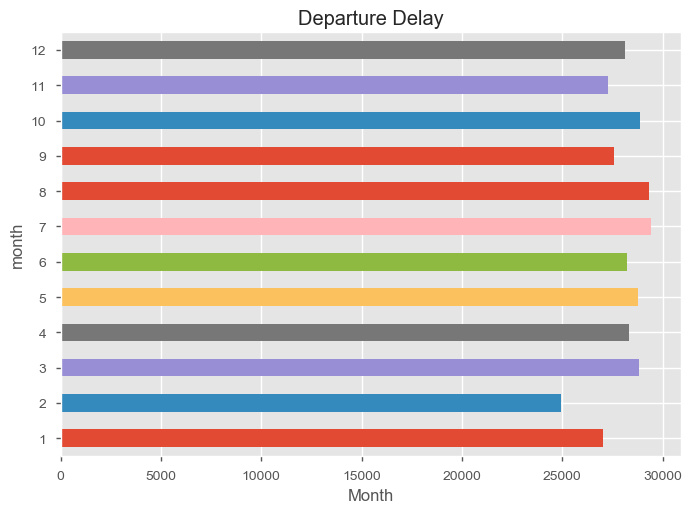

In [29]:
group_month_1.plot(kind ='barh', title = 'Departure Delay')
plt.xlabel('Delay in No. of times')
plt.xlabel('Month')
plt.show();

## ANS - Month July has the maximum departure delays in total of 29,425 times.

## (d) - Which flight is having maximum departure delay?

In [30]:
x = ['carrier','flight','tailnum','origin','dest','dep_delay']
delay_chart = round(df_flight.sort_values('dep_delay', ascending = False)[x].head(5))
delay_chart

,carrier,flight,tailnum,origin,dest,dep_delay
7072,HA,51,N384HA,JFK,HNL,1301.0
235778,MQ,3535,N504MQ,JFK,CMH,1137.0
8239,MQ,3695,N517MQ,EWR,ORD,1126.0
327043,AA,177,N338AA,JFK,SFO,1014.0
270376,MQ,3075,N665MQ,JFK,CVG,1005.0


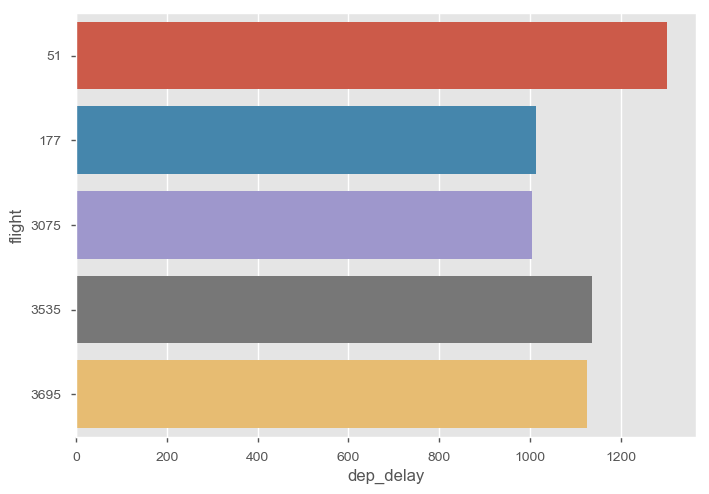

In [31]:
import seaborn as sns
ax = sns.barplot(x= 'dep_delay', y = 'flight', data = delay_chart, orient = 'h')

## Ans - Flight 51 of carrier HA with tailnum N384HA has the maximum departure delay of 1301 minutes.

## Q3 - Best airports in terms of time departure %

In [32]:
df_flight["Dep_Status"] = ""
df_flight.loc[df_flight.dep_delay < 0, "Dep_Status"] = "Early"
df_flight.loc[df_flight.dep_delay == 0, "Dep_Status"] = "On_Time"
df_flight.loc[df_flight.dep_delay > 0, "Dep_Status"] = "Delayed"

In [33]:
flight_dep = df_flight.groupby(["origin","Dep_Status"])["Dep_Status"].agg("count").unstack("Dep_Status")
flight_dep['Total'] = flight_dep['Delayed'] + flight_dep['Early'] + flight_dep['On_Time']     
flight_dep

Dep_Status,Delayed,Early,On_Time,Total
origin,,,,
EWR,52711,62539,5585,120835
JFK,42031,63009,6239,111279
LGA,33690,66282,4690,104662


In [34]:
flight_dep["Delayed%"] = (flight_dep.iloc[:,0]/flight_dep.iloc[0:,3]*100).round(2)
flight_dep["On_Time%"] = (flight_dep.iloc[:,2]/flight_dep.iloc[0:,3]*100).round(2)
flight_dep["Early%"] = (flight_dep.iloc[:,1]/flight_dep.iloc[0:,3]*100).round(2)
flight_dep

Dep_Status,Delayed,Early,On_Time,Total,Delayed%,On_Time%,Early%
origin,,,,,,,
EWR,52711,62539,5585,120835,43.62,4.62,51.76
JFK,42031,63009,6239,111279,37.77,5.61,56.62
LGA,33690,66282,4690,104662,32.19,4.48,63.33


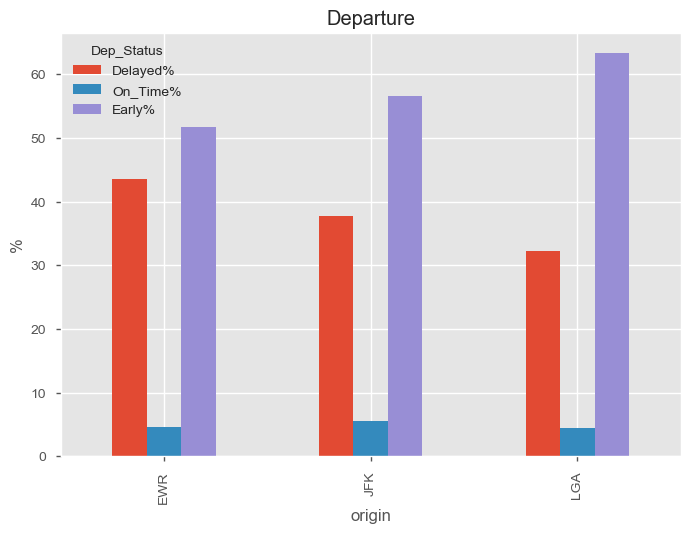

In [35]:
flight_dep[["Delayed%","On_Time%","Early%"]].plot(kind ="bar", title = "Departure")
plt.ylabel("%")
plt.show();

## ANS - LGA is the Best airports in terms of time departure %.

## Q4 - Aircraft speed analysis. 

In [36]:
df_flight['speed_in_mph'] = df_flight.distance/(df_flight.air_time/60)
x = ['carrier','tailnum','flight','origin','dest','air_time','distance','speed_in_mph']
speed_chart = round(df_flight.sort_values('speed_in_mph',ascending = False)[x].head(5))
speed_chart

,carrier,tailnum,flight,origin,dest,air_time,distance,speed_in_mph
216447,DL,N666DN,1499,LGA,ATL,65.0,762,703.0
251999,EV,N17196,4667,EWR,MSP,93.0,1008,650.0
205388,EV,N14568,4292,EWR,GSP,55.0,594,648.0
157516,EV,N12567,3805,EWR,BNA,70.0,748,641.0
10223,DL,N956DL,1902,LGA,PBI,105.0,1035,591.0


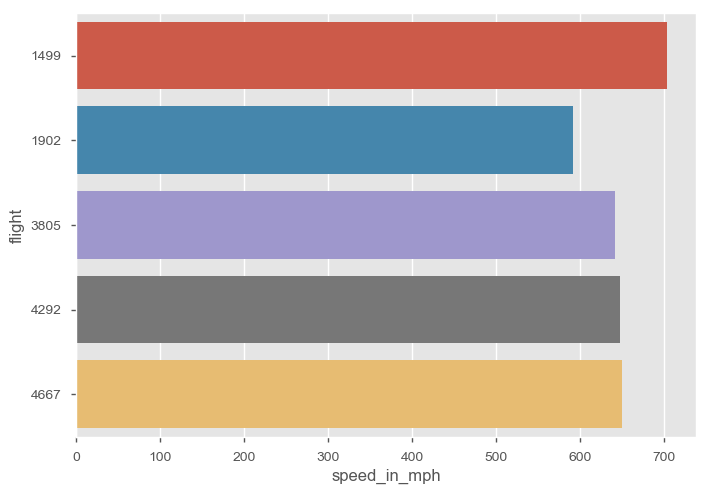

In [37]:
ax = sns.barplot(x = 'speed_in_mph', y = 'flight', data = speed_chart, orient = 'h')

## ANS -  Airline DL, flight 1499 from LGA to ATL recorded top most speed of 703 Mph on 25th May.

## Q5 - On time arrival % analysis.

In [38]:
df_flight["Arr_Status"] = ""

In [39]:
df_flight.loc[df_flight.arr_delay < 0, "Arr_Status"] = "Early"
df_flight.loc[df_flight.arr_delay == 0, "Arr_Status"] = "On_Time"
df_flight.loc[df_flight.arr_delay > 0, "Arr_Status"] = "Delayed"
df_flight_arr = df_flight.groupby(["dest","Arr_Status"])["Arr_Status"].agg("count").unstack("Arr_Status")
df_flight_arr.sample(10)

Arr_Status,Delayed,Early,On_Time
dest,,,
PBI,2870.0,3575.0,109.0
MSY,1497.0,2253.0,49.0
CRW,64.0,72.0,2.0
HDN,8.0,7.0,NaN
ANC,5.0,3.0,NaN
SBN,4.0,5.0,1.0
GSO,668.0,900.0,38.0
LGA,NaN,1.0,NaN
SYR,675.0,1059.0,27.0


In [40]:
df_flight_arr["Total"] = df_flight_arr["Delayed"] + df_flight_arr["Early"] + df_flight_arr["On_Time"]     
df_flight_arr["Delayed%"] = (df_flight_arr.iloc[:,0]/df_flight_arr.iloc[0:,3]*100).round(2)
df_flight_arr["On_Time%"] = (df_flight_arr.iloc[:,2]/df_flight_arr.iloc[0:,3]*100).round(2)
df_flight_arr["Early%"] = (df_flight_arr.iloc[:,1]/df_flight_arr.iloc[0:,3]*100).round(2)

In [41]:
df_flight_arrival = df_flight_arr.sort_values(by = ["On_Time%"], ascending = False)
df_flight_arrival_data = df_flight_arrival.head()
df_flight_arrival_data

Arr_Status,Delayed,Early,On_Time,Total,Delayed%,On_Time%,Early%
dest,,,,,,,
SBN,4.0,5.0,1.0,10.0,40.00,10.00,50.00
EYW,10.0,6.0,1.0,17.0,58.82,5.88,35.29
JAC,17.0,7.0,1.0,25.0,68.00,4.00,28.00
PSE,178.0,173.0,14.0,365.0,48.77,3.84,47.40
AVL,119.0,148.0,8.0,275.0,43.27,2.91,53.82


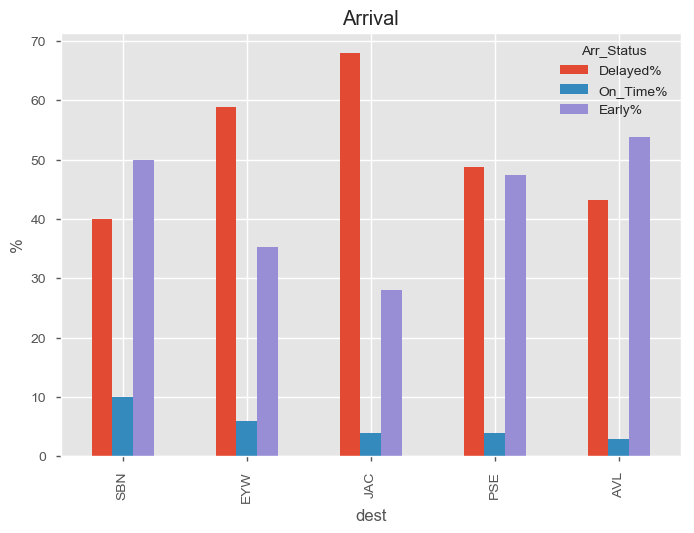

In [42]:
df_flight_arrival_data[["Delayed%","On_Time%","Early%"]].plot(kind ="bar", title = "Arrival")
plt.ylabel("%")
plt.show();

## ANS - SBN is the Best airport in terms of on time arrival %

## Q6 - Maximum number of flights headed to some particular destination

In [43]:
flights_max = df_flight.groupby('dest')['dest'].count().sort_values(ascending = False).head(5)
flights_max

dest
ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
Name: dest, dtype: int64

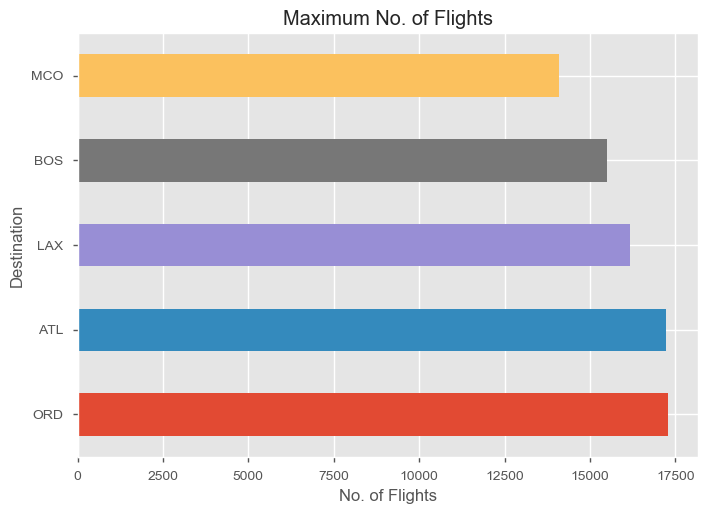

In [44]:
flights_max.plot(kind ="barh", title = "Maximum No. of Flights")
plt.xlabel("No. of Flights")
plt.ylabel("Destination")
plt.show();

## Ans - A maximum of 17,283 flights are heading to destination ORD in the year.

## Q7 - Shortest path between airports. 

In [45]:
df_flight['path'] = df_flight['origin'] + '_'+ df_flight['dest']

In [46]:
sh_path_1 = df_flight['distance'].groupby(df_flight['path']).sum()
sh_path_2 = sh_path_1.sort_values(ascending = True) 
short = sh_path_2.head(10)
short

path
EWR_LGA      17
LGA_LEX     604
JFK_BHM     865
JFK_STL     892
JFK_MEM     964
LGA_MYR    1689
EWR_SBN    2548
LGA_BWI    2775
JFK_JAC    3788
LGA_SBN    3906
Name: distance, dtype: int64

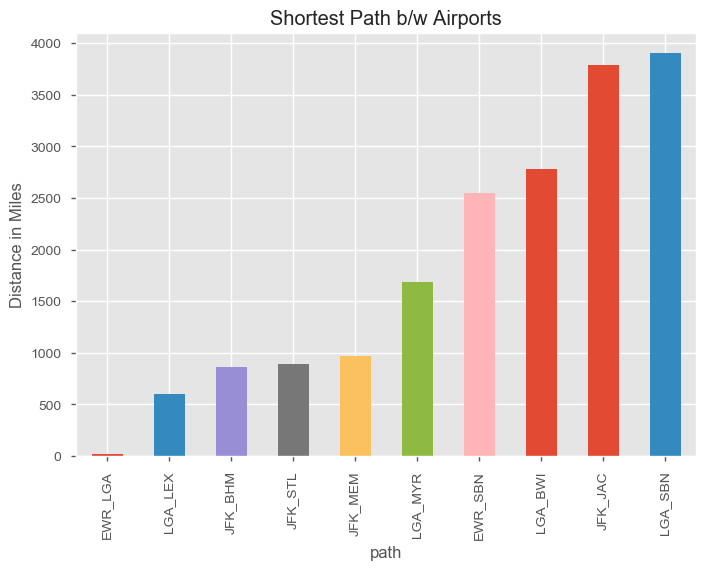

In [47]:
short.plot(kind ="bar", title = "Shortest Path b/w Airports")
plt.ylabel("Distance in Miles")
plt.show();

## ANS - Shortest path is between the airports EWR and LGA.